# **Part A-Regression**

**Objective:** Build a Linear Regression model to predict medical insurance charges.

SECTION 1 – Data Understanding
1. Load the dataset and display:
○ Shape
○ Column names
○ Data types
○ First 5 rows
2. Check:
○ Missing values
○ Duplicate rows
3. Perform EDA:
○ Distribution of charges
○ Scatter plot: age vs charges
○ Boxplot: smoker vs charges
○ Correlation heatmap
4. Write 3 observations from EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("insurance.csv")

In [6]:
print(df.shape)

(1338, 7)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [8]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [9]:
print(df.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [10]:
print(df.isnull())

        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]


In [11]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [12]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool


In [13]:
print(df.duplicated().sum())

1


In [14]:
#see the duplicate row
print(df[df.duplicated()])

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


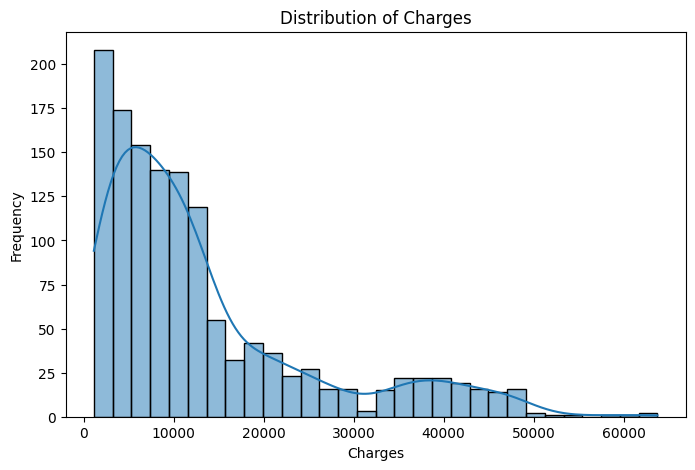

In [15]:
#Performing EDA
#Distriution of charges
plt.figure(figsize=(8,5))
sns.histplot(df["charges"], bins=30, kde=True)
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

This graph show:
1) How medical charges are distributed
2) How many people fall in different charge ranges



*   The Bars: (Histogram)
    Each bar shows:
    X-axis - Medical Charges
    Y-axis - Number of people(frequency)

  

*   The Smooth Blue Curve(KDE Line)
     It is the smoothed version of the histogram

     
     **Important Observation**
     Graph is right skewed(positively skewed)

     that means:
     1)Most values are small
     2)Few values are very large
     3)Long tail on the right side

     Meaing= most people pay lower medical charges


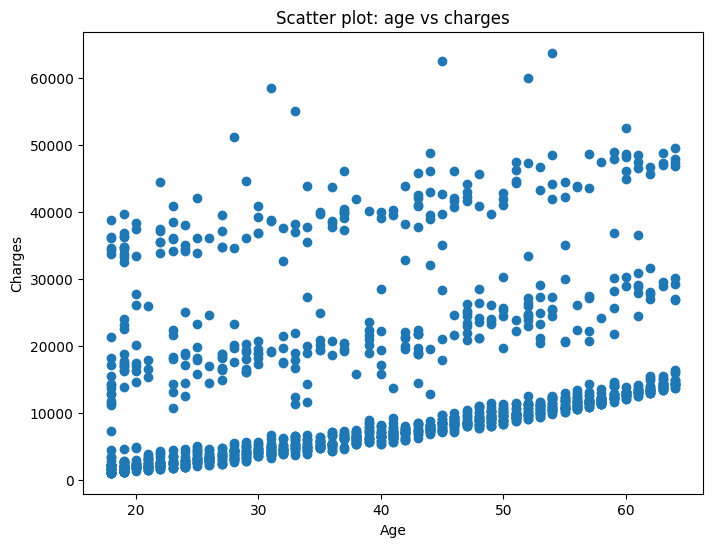

In [16]:
plt.figure(figsize =(8,6))
plt.scatter(df["age"], df["charges"])
plt.title("Scatter plot: age vs charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

The scatter plot shows a positive relationship between age and medical charges. However, the presence of distinct charge clusters suggests that another categorical variable (likely smoking status) significantly influences medical costs.

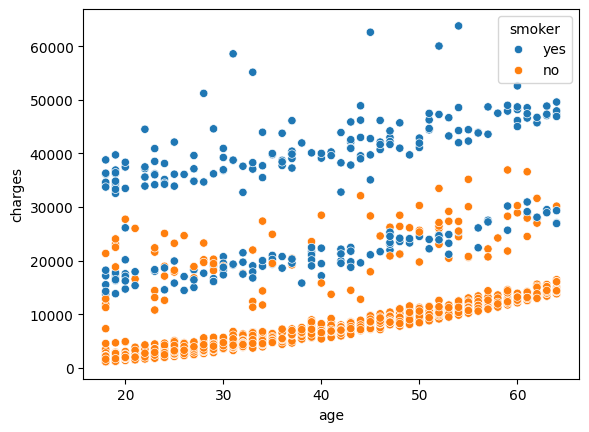

In [17]:
sns.scatterplot(x="age", y="charges", hue="smoker", data = df)
plt.show()

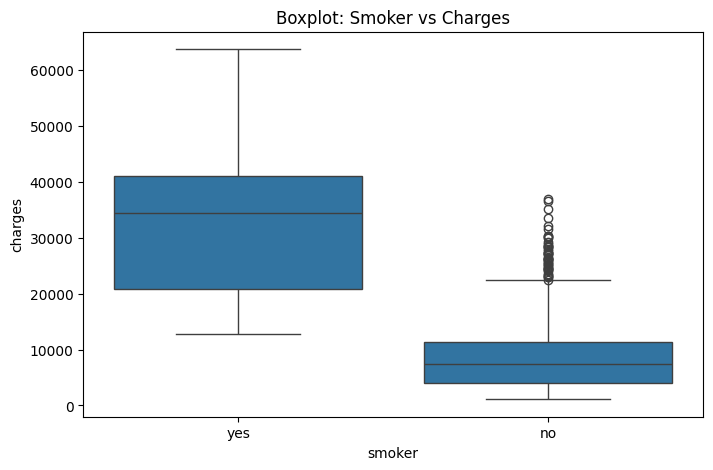

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x="smoker", y="charges", data= df)
plt.title("Boxplot: Smoker vs Charges")
plt.show()

1)Most smokers pay high medical costs

2)Large variability in smoker charges

3)Most non-smokers pay relatively
low charges.

4)A few non-smokers have high expenses (outliers)

SECTION 2 – Data Preprocessing

5. Encode categorical variables properly.

6. Separate features (X) and target (y).

7. Perform train-test split (80-20).

8. Apply feature scaling (if required).

9. Explain why scaling is / isn’t required.


In [19]:
df.select_dtypes(include="object").columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [20]:
df.select_dtypes(include="object").columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [21]:
df = pd.get_dummies(df, drop_first=True)

In [22]:
X = df.drop("charges", axis = 1)
y=df["charges"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

SECTION 4 – Model Evaluation
13. Predict on test data.
14. Calculate:
○ MAE
○ MSE
○ RMSE
○ R2 Score
15. Plot:
○ Actual vs Predicted
○ Residual plot
16. Interpret R2 score

In [28]:
y_pred = model.predict(X_test_scaled)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [30]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 4181.194473753651


In [31]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 33596915.851361476


In [32]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 5796.284659276274


In [34]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.7835929767120722


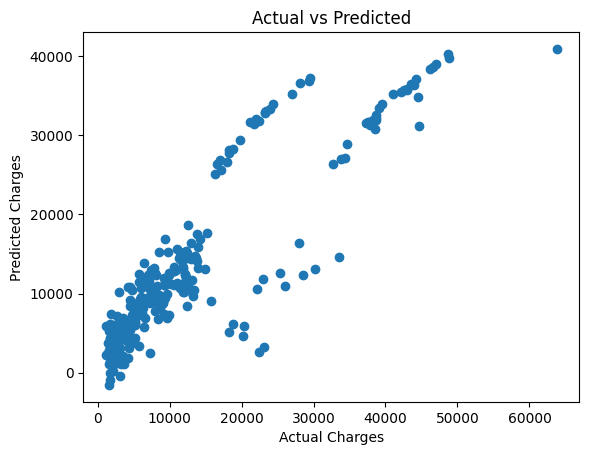

In [36]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted")
plt.show()

Points close to diagonal → good model

Wide scatter → poor model

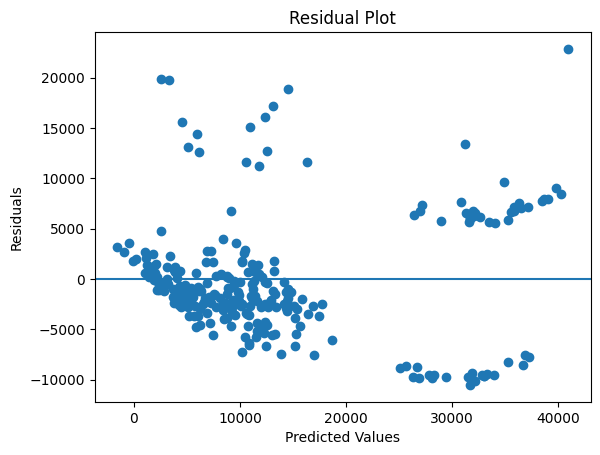

In [37]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Good Model:

Residuals randomly scattered around 0

No clear pattern

Bad Model:

Funnel shape

Pattern visible

Interpret R² Score

R² tells:

How much variation in target is explained by the model.


Conclusion:
The Linear Regression model achieved an R² score of 0.78, indicating that approximately 78% of the variance in medical charges is explained by the input features. This suggests a strong linear relationship between the predictors and the target variable.

In [40]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

In [41]:
coeff_df.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
4,smoker_yes,9558.481409
0,age,3614.975415
1,bmi,2036.228123
2,children,516.890247
3,sex_male,-9.293101
5,region_northwest,-158.140981
6,region_southeast,-290.157047
7,region_southwest,-349.110678


Section 5

Q1)Which Variable Impacts Charges the Most?

Solution:  The variable with the highest impact on medical charges is smoking status. Being a smoker significantly increases predicted medical expenses compared to non-smokers.

Q2)How Much More Do Smokers Pay?

Solution: According to the regression model, smokers are predicted to pay approximately 9558 more in medical charges compared to non-smokers, after controlling for age, BMI, children, and region.

Q3)Is BMI statistically impactful?

Solution: BMI has a meaningful positive impact on charges. A one-unit increase in BMI increases predicted medical charges by approximately 2036 units, suggesting BMI is an important but secondary predictor compared to smoking status and age.


Q4)Can this model be used in production? Why or why not?

Solution: Although the regression model identifies meaningful predictors (particularly smoking status, age, and BMI), it is not production-ready. The dataset is limited in size and scope, lacks rigorous validation, and does not account for broader real-world complexities such as medical history, chronic conditions, and regulatory constraints. Further validation and testing would be required before deployment in an insurance pricing system.



# **Part B - Classification**
Movie Rating Prediction
Objective: Build a classification model to predict whether a movie is a Hit or Flop


Section 1-Data Understanding

In [44]:
import pandas as pd

df = pd.read_csv("tmdb_5000_movies.csv")

print("Shape:", df.shape)
print("Columns:", df.columns)
print("Data Types:\n", df.dtypes)

Shape: (4803, 20)
Columns: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Data Types:
 budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count   

In [45]:
df.isnull().sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [46]:
df = df.dropna()

In [47]:
df["Hit"] = df["vote_average"].apply(lambda x: 1 if x >= 7 else 0)

In [48]:
df["Hit"].value_counts()

,count
Hit,
0,1144
1,349


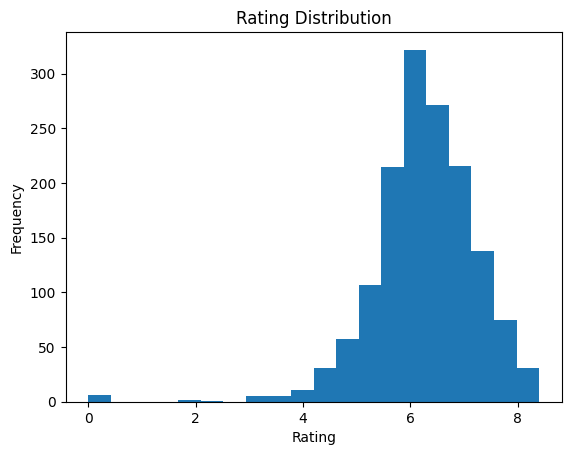

In [49]:
import matplotlib.pyplot as plt

plt.hist(df["vote_average"], bins=20)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Rating Distribution")
plt.show()

Observations:

1)Most movies have ratings between 5 and 7

2)Very few have rating above 8

3)The distribution is left skewed


SECTION 2 – Data Preprocessing

In [50]:
df = df.drop(["title", "homepage", "overview"], axis=1)

In [51]:
df = pd.get_dummies(df, drop_first=True)

In [52]:
#separate X and y
X = df.drop(["Hit", "vote_average"], axis=1)
y = df["Hit"]

In [53]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [54]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **SECTION 3 – Model Building**


In [55]:
#train logesitc regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
#display coefficients
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

coeff_df.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
5,vote_count,0.356900
4,runtime,0.277615
3,revenue,0.171560
2,popularity,0.166727
559,"genres_[{""id"": 99, ""name"": ""Documentary""}]",0.117151
...,...,...
396,"genres_[{""id"": 35, ""name"": ""Comedy""}, {""id"": 1...",-0.081385
1207,"keywords_[{""id"": 3487, ""name"": ""assistant""}, {...",-0.088642
6627,"tagline_Before Gru, they had a history of bad ...",-0.088642
2705,original_title_Minions,-0.088642


# **SECTION 4 – Evaluation**

In [57]:
#predict
y_pred = model.predict(X_test)

In [58]:
#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8093645484949833
Precision: 1.0
Recall: 0.03389830508474576
F1 Score: 0.06557377049180328


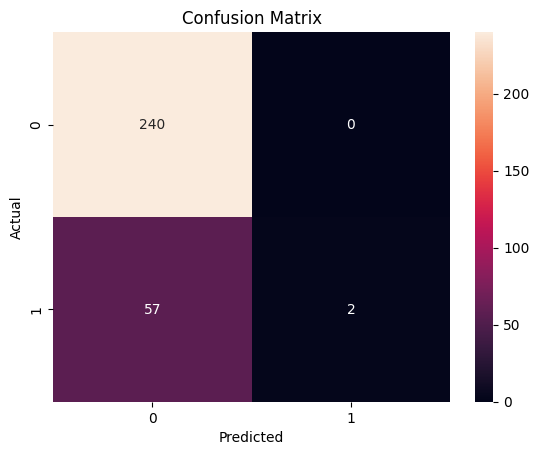

In [59]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **SECTION 5 – Business Interpretation**

1)What factors influence movie success?

Budget

Popularity

Vote count

Certain genres


In [60]:
df["Hit"].value_counts()

,count
Hit,
0,1144
1,349


2)Is Dataset Balanced?

Imbalanced

3)Production Trust?

solution:
While the model provides reasonable predictive performance, additional validation and feature engineering are required before deploying in production.